In [1]:
import yfinance as yf


In [15]:
pip install html5lib


  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

In [3]:
tesla_data.reset_index(inplace=True)


In [4]:
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [6]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

In [7]:
tables = soup.find_all("table")
tesla_revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue_table = table
        break

In [16]:
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
tesla_revenue = tesla_revenue.dropna()
tesla_revenue.tail()


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\abala\AppData\Local\Temp\ipykernel_18880\2435008249.py:3: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
C:\Users\abala\AppData\Local\Temp\ipykernel_18880\2435008249.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]


FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [10]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

In [11]:
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [12]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

In [13]:
tables = soup.find_all("table")
gme_revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue_table = table
        break

In [18]:
gme_revenue = pd.read_html(str(gme_revenue_table))[0]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
gme_revenue = gme_revenue.dropna()
gme_revenue.tail()


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\abala\AppData\Local\Temp\ipykernel_18880\2107589620.py:3: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
C:\Users\abala\AppData\Local\Temp\ipykernel_18880\2107589620.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_revenue_table))[0]
C:\Users\abala\AppData\Local\Temp\ipykernel_18880\2107589620.py:3: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)


FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

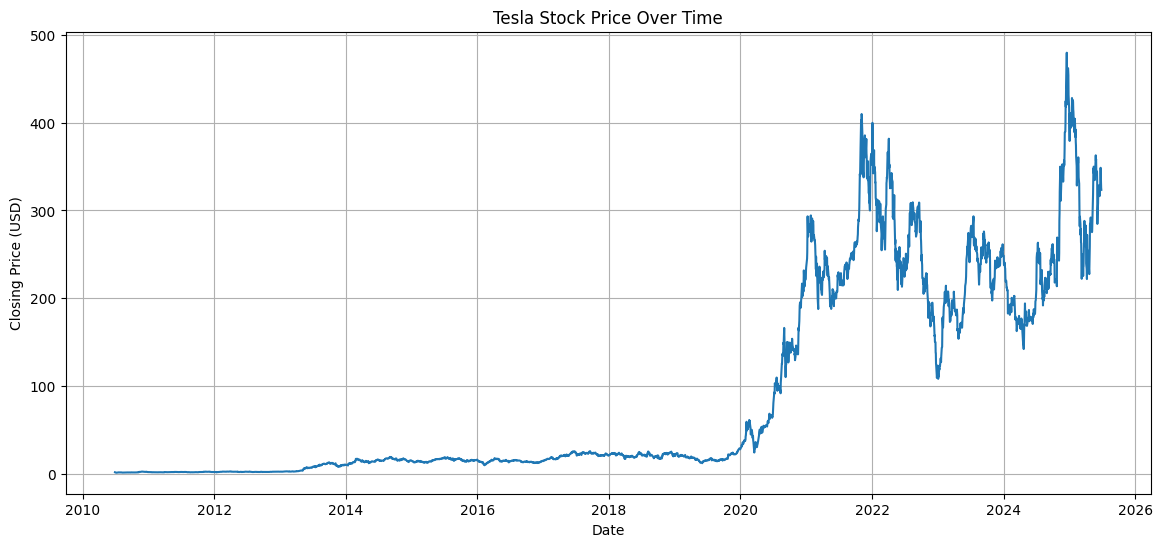

In [19]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data['Date'], stock_data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()
make_graph(tesla_data, "Tesla Stock Price Over Time")


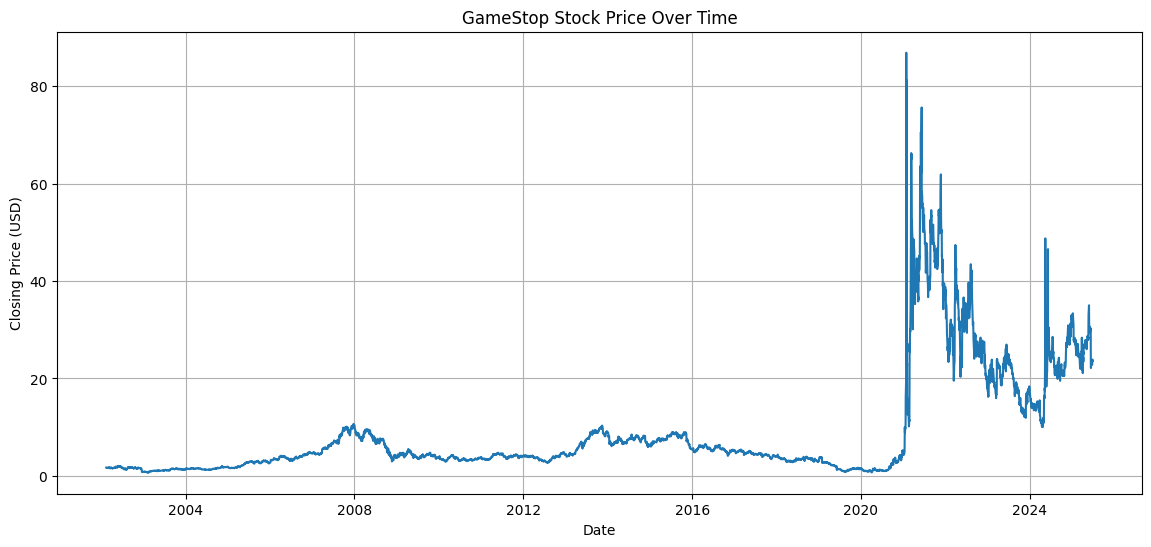

In [20]:
make_graph(gme_data, "GameStop Stock Price Over Time")
